In [2]:
import pandas as pd  # 导入pandas库
import numpy as np  # 导入numpy库
from sklearn.impute import SimpleImputer  # 导入sklearn中SimpleImputer库

df = pd.DataFrame(np.random.randn(6, 4), columns=['col1', 'col2', 'col3', 'col4'])  # 生成一份数据
df.iloc[1:2, 1] = np.nan  # 增加缺失值
df.iloc[4, 3] = np.nan  # 增加缺失值
df

,col1,col2,col3,col4
0,0.957052,0.294042,0.499884,-0.956422
1,-0.398996,NaN,1.215117,1.376556
2,1.292393,0.180037,0.080660,1.151995
3,-1.200959,1.538328,-0.115407,-1.762510
4,0.542605,0.155436,-0.456807,NaN
5,-1.016327,-0.409680,2.839289,-0.451184


In [3]:
df.isnull()

,col1,col2,col3,col4
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False


In [4]:
df.isnull().any()

col1    False
col2     True
col3    False
col4     True
dtype: bool

In [5]:
df.isnull().all()

col1    False
col2    False
col3    False
col4    False
dtype: bool

In [6]:
df.dropna()

,col1,col2,col3,col4
0,0.957052,0.294042,0.499884,-0.956422
2,1.292393,0.180037,0.080660,1.151995
3,-1.200959,1.538328,-0.115407,-1.762510
5,-1.016327,-0.409680,2.839289,-0.451184


In [7]:
df = pd.DataFrame(np.random.randn(6, 4), columns=['col1', 'col2', 'col3', 'col4'])  # 生成一份数据
df.iloc[1:2, 1] = np.nan  # 增加缺失值
df.iloc[4, 3] = np.nan  # 增加缺失值
nan_model = SimpleImputer(missing_values=np.nan,strategy='mean')
nan_result = nan_model.fit_transform(df)

In [8]:
nan_result

array([[-0.6743827 , -1.15812193, -0.357757  ,  0.46351806],
       [-0.38982274, -1.03424389,  0.08942518, -0.53117911],
       [ 1.04644512,  1.2109869 ,  1.2155235 , -0.28437234],
       [ 1.132135  , -1.69880847,  1.01210031, -0.3792753 ],
       [ 0.77791357, -1.31047469, -1.26355953, -0.21856034],
       [-0.29926642, -2.21480124, -1.2399553 , -0.36149299]])

In [9]:
df

,col1,col2,col3,col4
0,-0.674383,-1.158122,-0.357757,0.463518
1,-0.389823,NaN,0.089425,-0.531179
2,1.046445,1.210987,1.215523,-0.284372
3,1.132135,-1.698808,1.012100,-0.379275
4,0.777914,-1.310475,-1.263560,NaN
5,-0.299266,-2.214801,-1.239955,-0.361493


In [10]:
df.fillna(method='backfill')

,col1,col2,col3,col4
0,-0.674383,-1.158122,-0.357757,0.463518
1,-0.389823,1.210987,0.089425,-0.531179
2,1.046445,1.210987,1.215523,-0.284372
3,1.132135,-1.698808,1.012100,-0.379275
4,0.777914,-1.310475,-1.263560,-0.361493
5,-0.299266,-2.214801,-1.239955,-0.361493


In [11]:
df.fillna(method='pad')

,col1,col2,col3,col4
0,-0.674383,-1.158122,-0.357757,0.463518
1,-0.389823,-1.158122,0.089425,-0.531179
2,1.046445,1.210987,1.215523,-0.284372
3,1.132135,-1.698808,1.012100,-0.379275
4,0.777914,-1.310475,-1.263560,-0.379275
5,-0.299266,-2.214801,-1.239955,-0.361493


In [15]:
df.fillna({'col4':11.,'col2':1.2}) #通过字典指定 每一列的缺失值 用什么去填充

,col1,col2,col3,col4
0,-0.674383,-1.158122,-0.357757,0.463518
1,-0.389823,1.200000,0.089425,-0.531179
2,1.046445,1.210987,1.215523,-0.284372
3,1.132135,-1.698808,1.012100,-0.379275
4,0.777914,-1.310475,-1.263560,11.000000
5,-0.299266,-2.214801,-1.239955,-0.361493


In [16]:
#异常值处理
import pandas as pd  # 导入pandas库
# 生成异常数据
df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13],
                   'col2': [12, 17, 31, 53, 22, 32, 43]})
df  # 打印输出

,col1,col2
0,1,12
1,120,17
2,3,31
3,5,53
4,2,22
5,12,32
6,13,43


In [17]:
df_zcore = df.copy()

In [18]:
df_zcore

,col1,col2
0,1,12
1,120,17
2,3,31
3,5,53
4,2,22
5,12,32
6,13,43


In [19]:
cols = df.columns
for col in cols:
    df_col = df[col]
    z_score = (df_col-df_col.mean())/df_col.std() # mean平均值 std标准差
    df_zcore[col]=z_score.abs()>2.2

In [20]:
df_zcore

,col1,col2
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [21]:
import pandas as pd  # 导入pandas库
# 生成重复数据
data1, data2, data3, data4 = ['a', 3], ['b', 2], ['a', 3], ['c', 2]
df = pd.DataFrame([data1, data2, data3, data4], columns=['col1', 'col2'])
print(df)

  col1  col2
0    a     3
1    b     2
2    a     3
3    c     2


In [22]:
df.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

In [23]:
df.drop_duplicates()

,col1,col2
0,a,3
1,b,2
3,c,2


In [24]:
# 标准化和归一化
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
data = np.loadtxt('data6.txt', delimiter='\t')  # 读取数据

In [27]:
data

array([[ 8.9 , 10.4 ],
       [ 7.76,  4.68],
       [ 7.54,  3.84],
       ...,
       [ 2.26,  5.14],
       [ 2.17,  3.54],
       [ 1.95,  3.81]])

In [26]:
zscore = preprocessing.StandardScaler()
data_scale_1 = zscore.fit_transform(data)
minmax_scaler = preprocessing.MinMaxScaler()
data_scale_2 = minmax_scaler.fit_transform(data)

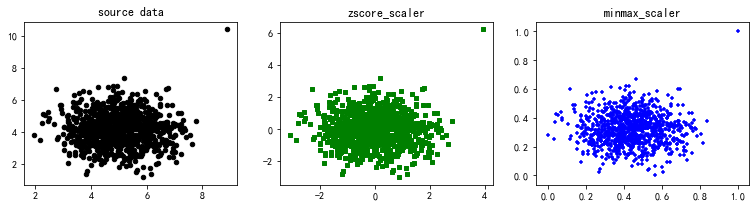

In [30]:
data_list = [data, data_scale_1, data_scale_2]  # 创建数据集列表
color_list = ['black', 'green', 'blue']  # 创建颜色列表
merker_list = ['o', ',', '+']  # 创建样式列表
title_list = ['source data', 'zscore_scaler', 'minmax_scaler']  # 创建标题列表
plt.figure(figsize=(13, 3))
for i,data_single in enumerate(data_list):
    plt.subplot(1,3,i+1)
    plt.scatter(data_single[:,:-1],data_single[:,-1],s = 20,marker=merker_list[i],c=color_list[i]) # x值，y值，s 指定点的大小，marker点样式，c 颜色
    plt.title(title_list[i])

In [31]:
### 离散化
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
# 读取数据
df = pd.read_table('data7.txt', names=['id', 'amount', 'income', 'datetime', 'age'])  # 读取数据文件
print(df.head(5))  # 打印输出前5条数据

      id  amount  income             datetime    age
0  15093    1390   10.40  2017-04-30 19:24:13   0-10
1  15062    4024    4.68  2017-04-27 22:44:59  70-80
2  15028    6359    3.84  2017-04-27 10:07:55  40-50
3  15012    7759    3.70  2017-04-04 07:28:18  30-40
4  15021     331    4.25  2017-04-08 11:14:00  70-80


e:\python\ai27\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id          100 non-null int64
amount      100 non-null int64
income      100 non-null float64
datetime    100 non-null object
age         100 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [33]:
df['datetime'] = list(map(pd.to_datetime,df['datetime']))

In [ ]:
pd.to_datetime()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id          100 non-null int64
amount      100 non-null int64
income      100 non-null float64
datetime    100 non-null datetime64[ns]
age         100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ KB


In [35]:
df['weekday'] = [i.weekday() for i in df['datetime']] 

In [36]:
df

,id,amount,income,datetime,age,weekday
0,15093,1390,10.40,2017-04-30 19:24:13,0-10,6
1,15062,4024,4.68,2017-04-27 22:44:59,70-80,3
2,15028,6359,3.84,2017-04-27 10:07:55,40-50,3
3,15012,7759,3.70,2017-04-04 07:28:18,30-40,1
4,15021,331,4.25,2017-04-08 11:14:00,70-80,5
5,15031,4669,4.04,2017-04-24 03:18:54,10-20,0
6,15008,1088,4.53,2017-04-24 06:03:56,20-30,0
7,15092,602,4.29,2017-04-11 02:44:06,10-20,1
8,15022,5532,4.43,2017-04-23 23:51:08,10-20,6
9,15022,5350,2.17,2017-04-19 21:48:40,>90,2


In [38]:
#自定义分箱边界离散化
bins=[0,200,1000,5000,10000]
 df['amount1'] = pd.cut(df['amount'],bins)

In [42]:
pd.cut(df['amount'],bins).value_counts()

(1000, 5000]     48
(5000, 10000]    38
(200, 1000]      11
(0, 200]          3
Name: amount, dtype: int64

In [43]:
#创建kmeans模型指定要分箱的数量
data= df['amount']
data_reshape = data.values.reshape((data.shape[0],1))

In [44]:
model_kmeans = KMeans(n_clusters=4,random_state=0)

In [45]:
kmeans_result = model_kmeans.fit_predict(data_reshape)

In [46]:
df['amount2'] = kmeans_result

In [48]:
df['amount2'].value_counts()

2    30
0    27
1    23
3    20
Name: amount2, dtype: int64

In [49]:
df['amount3'] = pd.qcut(df['amount'], 4, labels=['bad', 'medium', 'good', 'awesome']) 
df = df.drop('amount', 1)  # 丢弃名为amount的列
print(df.head(5))  # 打印输出前5条数据

      id  income            datetime    age  weekday        amount1  amount2  \
0  15093   10.40 2017-04-30 19:24:13   0-10        6   (1000, 5000]        0   
1  15062    4.68 2017-04-27 22:44:59  70-80        3   (1000, 5000]        2   
2  15028    3.84 2017-04-27 10:07:55  40-50        3  (5000, 10000]        3   
3  15012    3.70 2017-04-04 07:28:18  30-40        1  (5000, 10000]        3   
4  15021    4.25 2017-04-08 11:14:00  70-80        5    (200, 1000]        0   

   amount3  
0      bad  
1     good  
2  awesome  
3  awesome  
4      bad  


In [53]:
df['amount3'].value_counts()

awesome    25
good       25
medium     25
bad        25
Name: amount3, dtype: int64

In [54]:
binarizer_scaler = preprocessing.Binarizer(threshold=df['income'].mean())  # 建立Binarizer模型对象
income_tmp = binarizer_scaler.fit_transform(df[['income']])  # Binarizer标准化转换
income_tmp.resize(df['income'].shape)  # 转换数据形状
df['income'] = income_tmp  # Binarizer标准化转换

In [55]:
df['income'] 

0     1.0
1     1.0
2     0.0
3     0.0
4     1.0
5     0.0
6     1.0
7     1.0
8     1.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    1.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
     ... 
70    1.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    1.0
78    0.0
79    1.0
80    1.0
81    1.0
82    0.0
83    1.0
84    1.0
85    0.0
86    0.0
87    1.0
88    0.0
89    1.0
90    1.0
91    1.0
92    1.0
93    0.0
94    1.0
95    1.0
96    0.0
97    1.0
98    1.0
99    0.0
Name: income, Length: 100, dtype: float64

In [56]:
import pandas as pd  # 导入pandas库
from sklearn.preprocessing import OneHotEncoder  # 导入库
# 生成数据
df = pd.DataFrame({'id': [3566841, 6541227, 3512441],
                   'sex': ['male', 'Female', 'Female'],
                   'level': ['high', 'low', 'middle'],
                   'score': [1, 2, 3]})
print(df)  # 打印输出原始数据框

        id     sex   level  score
0  3566841    male    high      1
1  6541227  Female     low      2
2  3512441  Female  middle      3


In [57]:
# 使用sklearn处理数据
id_data = df[['id']]
raw_convert_data = df.iloc[:,1:] # iloc 利用索引从dataframe中切片
raw_convert_data

,sex,level,score
0,male,high,1
1,Female,low,2
2,Female,middle,3


In [58]:
model_enc = OneHotEncoder()

In [61]:
df_news = model_enc.fit_transform(raw_convert_data).toarray()

In [62]:
df_news

array([[0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1.]])

In [63]:
df_all = pd.concat((id_data,pd.DataFrame(df_news)),axis = 1)

In [64]:
df_all

,id,0,1,2,3,4,5,6,7
0,3566841,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,6541227,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3512441,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [65]:
df

,id,sex,level,score
0,3566841,male,high,1
1,6541227,Female,low,2
2,3512441,Female,middle,3


In [66]:
#pandas get_dummuies 
df_new2 = pd.get_dummies(raw_convert_data)

In [67]:
df_all = pd.concat((id_data,pd.DataFrame(df_new2)),axis = 1)

In [68]:
df_all

,id,score,sex_Female,sex_male,level_high,level_low,level_middle
0,3566841,1,0,1,1,0,0
1,6541227,2,1,0,0,1,0
2,3512441,3,1,0,0,0,1


In [69]:
### 时间类型数据处理
import pandas as pd
car_sales = pd.read_csv('car_data.csv')
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [70]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
date_t    1512 non-null object
cnt       1032 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [71]:
car_sales.describe()

,cnt
count,1032.000000
mean,1760.124031
std,1153.164214
min,12.000000
25%,1178.750000
50%,1774.000000
75%,2277.750000
max,7226.000000


In [72]:
car_sales['date_t'].dtype

dtype('O')

In [81]:
#转换成时间序列类型
pd.to_datetime(car_sales['date_t']).dt.day

0       31
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
        ..
1482    21
1483    22
1484    23
1485    24
1486    25
1487    26
1488    27
1489    28
1490    29
1491    30
1492    31
1493     1
1494     2
1495     3
1496     4
1497     5
1498     6
1499     7
1500     8
1501     9
1502    10
1503    11
1504    12
1505    13
1506    14
1507    15
1508    16
1509    17
1510    18
1511    19
Name: date_t, Length: 1512, dtype: int64

In [93]:
### 过采样 欠采样

import pandas as pd
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler  # 欠抽样处理库RandomUnderSampler
# 导入数据文件
df = pd.read_csv('data2.txt', sep='\t',
                   names=['col1', 'col2', 'col3', 'col4', 'col5', 'label'])  # 读取数据文件
x, y = df.iloc[:, :-1],df.iloc[:, -1]  # 切片，得到输入x，标签y
groupby_data_orgianl = df.groupby('label').count()  # 对label做分类汇总
print(groupby_data_orgianl)  # 打印输出原始数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0       475   475   475   475   475
1       525   525   525   525   525


In [94]:
# 使用RandomUnderSampler方法进行欠抽样处理
model_RandomUnderSampler = RandomUnderSampler()  # 建立RandomUnderSampler模型对象
x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled = model_RandomUnderSampler.fit_sample(
    x,
    y)  # 输入数据并作欠抽样处理
x_RandomUnderSampler_resampled = pd.DataFrame(x_RandomUnderSampler_resampled,
                                              columns=['col1', 'col2', 'col3', 'col4',
                                                       'col5'])  # 将数据转换为数据框并命名列名
y_RandomUnderSampler_resampled = pd.DataFrame(y_RandomUnderSampler_resampled,
                                              columns=['label'])  # 将数据转换为数据框并命名列名
RandomUnderSampler_resampled = pd.concat(
    [x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled],
    axis=1)  # 按列合并数据框
groupby_data_RandomUnderSampler = RandomUnderSampler_resampled.groupby(
    'label').count()  # 对label做分类汇总
print(groupby_data_RandomUnderSampler) 

       col1  col2  col3  col4  col5
label                              
0       475   475   475   475   475
1       475   475   475   475   475


In [92]:
# 使用SMOTE方法进行过抽样处理
model_smote = SMOTE()  # 建立SMOTE模型对象
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(x, y)  # 输入数据并作过抽样处理
x_smote_resampled = pd.DataFrame(x_smote_resampled,
                                 columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['label'])  # 将数据转换为数据框并命名列名
smote_resampled = pd.concat([x_smote_resampled, y_smote_resampled], axis=1)  # 按列合并数据框
groupby_data_smote = smote_resampled.groupby('label').count()  # 对label做分类汇总
print(groupby_data_smote)  # 打印输出经过SMOTE处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0       525   525   525   525   525
1       525   525   525   525   525


In [87]:
df

,1 -1 1 -1 -1 1
0,-1\t0\t1\t-1\t-1\t0
1,0\t1\t0\t0\t1\t0
2,0\t1\t2\t-2\t1\t1
3,-2\t1\t1\t-2\t1\t1
4,1\t-1\t1\t-1\t-2\t1
5,-2\t1\t-1\t1\t1\t0
6,0\t-1\t1\t-1\t-1\t1
7,0\t1\t1\t-1\t1\t1
8,0\t1\t1\t-1\t1\t1
9,1\t1\t2\t-2\t0\t0


In [83]:
# 使用SMOTE方法进行过抽样处理
model_smote = SMOTE()  # 建立SMOTE模型对象
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(x, y)  # 输入数据并作过抽样处理
x_smote_resampled = pd.DataFrame(x_smote_resampled,
                                 columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['label'])  # 将数据转换为数据框并命名列名
smote_resampled = pd.concat([x_smote_resampled, y_smote_resampled], axis=1)  # 按列合并数据框
groupby_data_smote = smote_resampled.groupby('label').count()  # 对label做分类汇总
print(groupby_data_smote)  # 打印输出经过SMOTE处理后的数据集样本分类分布

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [95]:
import random  # 导入标准库
import numpy as np  # 导入第三方库
data = np.loadtxt('data3.txt')  # 导入普通数据文件
shuffle_index = np.random.choice(np.arange(data.shape[0]),2000,True)#随机生成2000个行号
data_sample = data[shuffle_index] #从原始数据中取出200个行号对应的数据
print(data_sample[:2])  # 打印输出前2条数据
print(len(data_sample))  # 打印输出抽样样本量

[[ -2.69018349   9.6376941    4.44467605   1.24711239  -6.53828293]
 [-10.70816663   8.94091619   7.57760865  -6.1257784   -3.95963838]]
2000


In [97]:
len(data)

10000

In [98]:
data.shape[0]

10000

In [99]:
# 等距抽样
data = np.loadtxt('data3.txt')  # 导入普通数据文件
sample_count = 2000  # 指定抽样数量
record_count = data.shape[0]  # 获取最大样本量
width = record_count / sample_count  # 计算抽样间距
data_sample = []  # 初始化空白列表，用来存放抽样结果数据
i = 0  # 自增计数以得到对应索引值
while len(data_sample) <= sample_count and i * width <= record_count - 1:  # 当样本量小于等于指定抽样数量并且矩阵索引在有效范围内时
    data_sample.append(data[int(i * width)])  # 新增样本
    i += 1  # 自增长
print(data_sample[:2])  # 打印输出前2条数据
print(len(data_sample))  # 打印输出样本数量

[array([-3.08057779,  8.09020329,  2.02732982,  2.92353937, -6.06318211]), array([-2.11984871,  7.74916701,  5.7318711 ,  4.75148273, -5.68598747])]
2000


In [100]:
width

5.0